In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('reviews.csv')
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [4]:
df.fillna({
    'title' : 'missing',
    'body' : 'missing',
},inplace=True)


In [6]:
df['text'] = df['title'] + ' ' + df['body']

In [7]:
df.drop(['title','body','name','asin'],axis=1,inplace=True)

df.head()

,rating,date,verified,helpfulVotes,text
0,3,"October 11, 2005",False,1.0,"Def not best, but not worst I had the Samsung ..."
1,1,"January 7, 2004",False,17.0,Text Messaging Doesn't Work Due to a software ...
2,5,"December 30, 2003",False,5.0,"Love This Phone This is a great, reliable phon..."
3,3,"March 18, 2004",False,1.0,"Love the Phone, BUT...! I love the phone and a..."
4,4,"August 28, 2005",False,1.0,"Great phone service and options, lousy case! T..."


# Data Visualization

In [23]:
def year(x):
    return x[-4:]

df['year'] = df['date'].apply(year)

In [24]:
df.head()

,rating,date,verified,helpfulVotes,text,year
0,3,"October 11, 2005",False,1.0,"Def not best, but not worst I had the Samsung ...",2005
1,1,"January 7, 2004",False,17.0,Text Messaging Doesn't Work Due to a software ...,2004
2,5,"December 30, 2003",False,5.0,"Love This Phone This is a great, reliable phon...",2003
3,3,"March 18, 2004",False,1.0,"Love the Phone, BUT...! I love the phone and a...",2004
4,4,"August 28, 2005",False,1.0,"Great phone service and options, lousy case! T...",2005


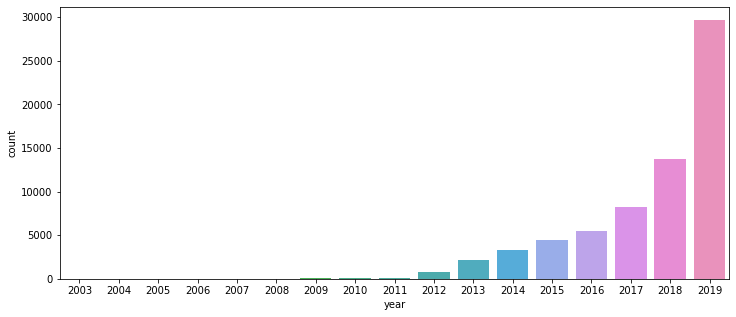

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(df['year'])

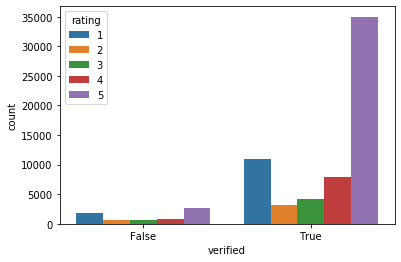

In [29]:
sns.countplot(df['verified'],hue=df['rating'])

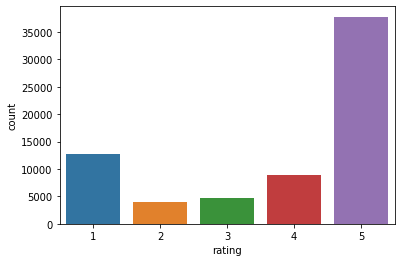

In [30]:
sns.countplot(df['rating'])

In [8]:
df['rating'].value_counts()

5    37752
1    12743
4     8824
3     4752
2     3915
Name: rating, dtype: int64

# Rating - 1 And 5

In [9]:
new = df[(df['rating']==1) | (df['rating']==5)]

In [10]:
new['rating'].value_counts()

5    37752
1    12743
Name: rating, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new['text'],new['rating'], test_size=0.33, random_state=101)

# Text Processing

In [12]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

In [13]:
def text_processing(mess):
    
    nonpunc = [char for char in mess if char not in string.punctuation]
    
    nonpunc = ''.join(nonpunc)
    
    return [stemming.stem(word) for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

# naive_bayes  -MultinomialNB

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [15]:
pipeline = Pipeline([
    ('bog',CountVectorizer(analyzer=text_processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [16]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bog', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [17]:
predict = pipeline.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


print(classification_report(y_test,predict))
print()
print(confusion_matrix(y_test,predict))
print()
print('Accuracy -> ',accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           1       0.97      0.64      0.78      4266
           5       0.89      0.99      0.94     12398

    accuracy                           0.90     16664
   macro avg       0.93      0.82      0.86     16664
weighted avg       0.91      0.90      0.90     16664


[[ 2750  1516]
 [   76 12322]]

Accuracy ->  0.9044647143542967


# Random-Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bog',CountVectorizer(analyzer=text_processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [32]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bog', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [33]:
predict = pipeline.predict(X_test)

In [34]:
print(classification_report(y_test,predict))
print()
print(confusion_matrix(y_test,predict))
print()
print('Accuracy -> ',accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           1       0.96      0.83      0.89      4266
           5       0.94      0.99      0.97     12398

    accuracy                           0.95     16664
   macro avg       0.95      0.91      0.93     16664
weighted avg       0.95      0.95      0.95     16664


[[ 3546   720]
 [  159 12239]]

Accuracy ->  0.94725156024964
